# iris 데이터 전처리, 주성분 분석(PCA)

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings(action = 'ignore')

from matplotlib import font_manager, rc 
plt.rcParams['axes.unicode_minus'] = False
font_name = font_manager.FontProperties(fname= "c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

## iris 데이터셋

In [57]:
from sklearn.datasets import load_iris
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

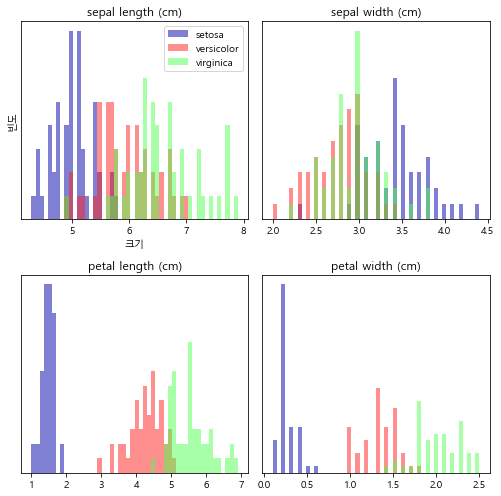

In [69]:
fig, axes = plt.subplots(2, 2, figsize=(7,7))
setosa = iris.data[iris.target == 0]
versicolor = iris.data[iris.target == 1]
virginica = iris.data[iris.target == 2]

ax = axes.ravel()

for i in range(4):
    _, bins = np.histogram(iris.data[:, i], bins=50) 
    ax[i].hist(setosa[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(versicolor[:, i], bins=bins, color=mglearn.cm3(1), alpha=.5)
    ax[i].hist(virginica[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(iris.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel('크기')
ax[0].set_ylabel('빈도')
ax[0].legend(['setosa', 'versicolor', 'virginica'], loc='best')
fig.tight_layout()

## 1. 전처리

### 1) SVC

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                    random_state=0)

svm = SVC(C=100)
svm.fit(X_train, y_train)
print("훈련 세트 정확도: {:.2f}".format(svm.score(X_train, y_train)))
print("테스트 세트 정확도: {:.2f}".format(svm.score(X_test, y_test)))

훈련 세트 정확도: 0.98
테스트 세트 정확도: 0.97


### 2) MinMaxScaler

In [72]:
from sklearn.preprocessing import MinMaxScaler

# 0~1 사이로 스케일 조정
minmax_scaler = MinMaxScaler()
minmax_scaler.fit(X_train)
X_train_scaled = minmax_scaler.transform(X_train)
X_test_scaled = minmax_scaler.transform(X_test)

# 조정된 데이터로 SVM 학습
svm.fit(X_train_scaled, y_train)

# 스케일 조정된 훈련 세트의 정확도
print("스케일 조정된 훈련 세트의 정확도: {:.2f}".format(svm.score(X_train_scaled, y_train)))
# 스케일 조정된 테스트 세트의 정확도
print("스케일 조정된 테스트 세트의 정확도: {:.2f}".format(svm.score(X_test_scaled, y_test)))

스케일 조정된 훈련 세트의 정확도: 1.00
스케일 조정된 테스트 세트의 정확도: 0.97


### 3) StandardScaler

In [76]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
standard_scaler.fit(iris.data)
X_scaled = standard_scaler.transform(iris.data)

# 조정된 데이터로 SVM 학습
svm.fit(X_train_scaled, y_train)

# 스케일 조정된  훈련 세트의 정확도
print("스케일 조정된 훈련 세트의 정확도: {:.2f}".format(svm.score(X_train_scaled, y_train)))
# 스케일 조정된 테스트 세트의 정확도
print("스케일 조정된 테스트 세트의 정확도: {:.2f}".format(svm.score(X_test_scaled, y_test)))

스케일 조정된 훈련 세트의 정확도: 1.00
스케일 조정된 테스트 세트의 정확도: 0.97


## 2. 주성분 분석(PCA)

In [1]:
from sklearn.decomposition import PCA
import numpy as np
import mglearn

pca = PCA(n_components=2)
pca.fit(X_scaled) #standardscaler 로 주성분 분석

X_pca = pca.transform(X_scaled)
print("원본 데이터 형태 : {}".format(str(X_scaled.shape)))
print("축소된 데이터 형태 : {}".format(str(X_pca.shape)))

NameError: name 'X_scaled' is not defined

### 그래프

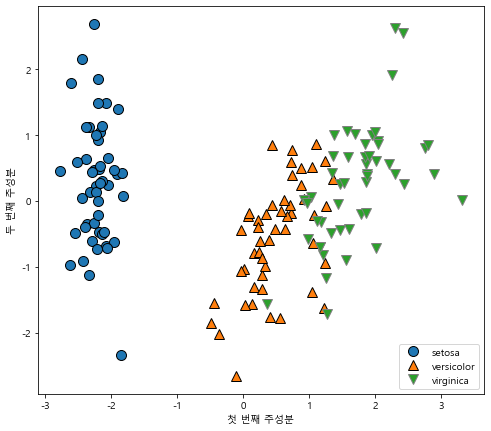

In [61]:
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0], X_pca[:,1],iris.target)
plt.legend(['setosa', 'versicolor', 'virginica'], loc='best')
plt.gca().set_aspect('equal')
plt.xlabel('첫 번째 주성분')
plt.ylabel('두 번째 주성분')
plt.show()

In [62]:
print('PCA 주성분 : {}'. format(pca.components_.shape))
print('PCA 주성분 : {}'. format(pca.components_))

PCA 주성분 : (2, 4)
PCA 주성분 : [[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]]


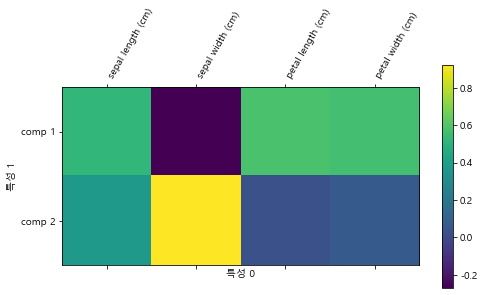

In [63]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0,1],['comp 1', 'comp 2'])
plt.colorbar()
plt.xticks(range(len(iris.feature_names)), iris.feature_names, rotation=60, ha = 'left' )
plt.xlabel('특성 0')
plt.ylabel('특성 1')
plt.show()